# WISE COMPUTING HEAVENS: Graviational Waves and the Fast Fourier Transform (FFT)
Instructor: Ian Johnson

Date: March 3 2025

NOTE: THESE SOLUTIONS ARE NOT FINISHED

Today we will learn about one of the most important tools in signal analysis and the modern world: The Fourier Transform

Let us just start with a simple plotting of a sine wave.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0.5, 1.0, 'Basic Sine Wave')

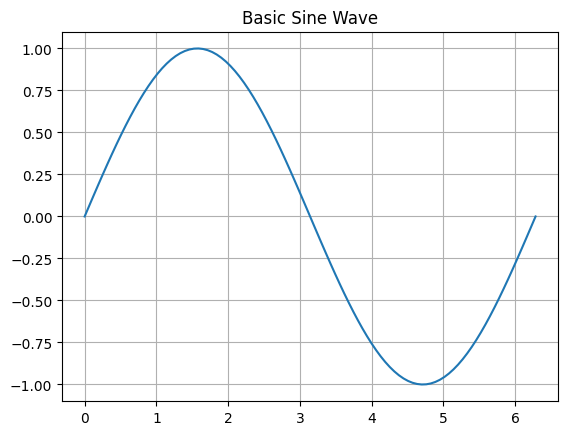

In [7]:
start = 0
end = 2* np.pi
steps_number = 100
angles = np.linspace(start, end, steps_number)
sine_wave = np.sin(angles)

plt.plot(angles, sine_wave)
plt.grid(True)
plt.title('Basic Sine Wave')

All waves can be thought about as adding these simple waves together. 

First let us consider what it is like to plot different periods/frequencies.

Text(0.5, 1.0, 'Basic Sine Wave')

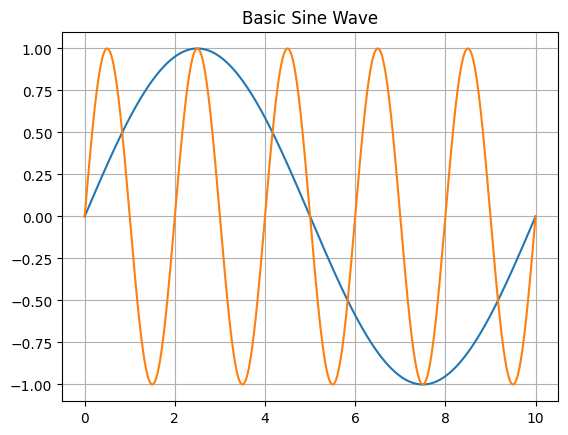

In [12]:
start = 0
end =10
steps_number = 1000
times = np.linspace(start, end, steps_number)

period1 = 10 # sec
freq1 = 1/period1 #Hz
sine_wave1 = np.sin(2 * np.pi * freq1 * times)
plt.plot(times, sine_wave1)


period2 = 2 # sec
freq2 = 1/period2 #Hz
sine_wave2 = np.sin(2 * np.pi * freq2 * times)
plt.plot(times, sine_wave2)


plt.grid(True)
plt.title('Basic Sine Wave')

What happens if we add these waves together?

Text(0.5, 1.0, 'Basic Sine Wave')

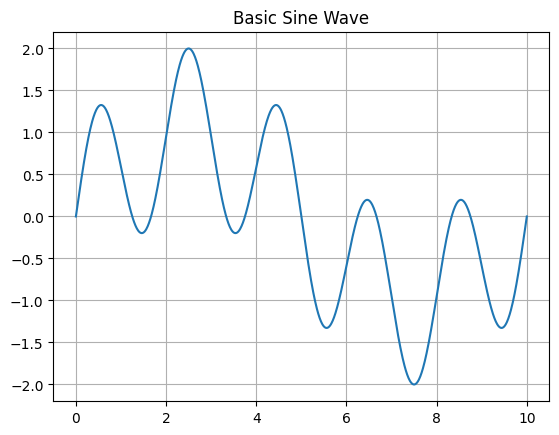

In [13]:
plt.plot(times, sine_wave2+sine_wave1)
plt.grid(True)
plt.title('Basic Sine Wave')

This alone is perhaps not a revelation, but we can make much less "wavy" periodic curves by expanding this idea.

Run the code below to see the same process make a square wave — a result extremely important to electrical engineers.

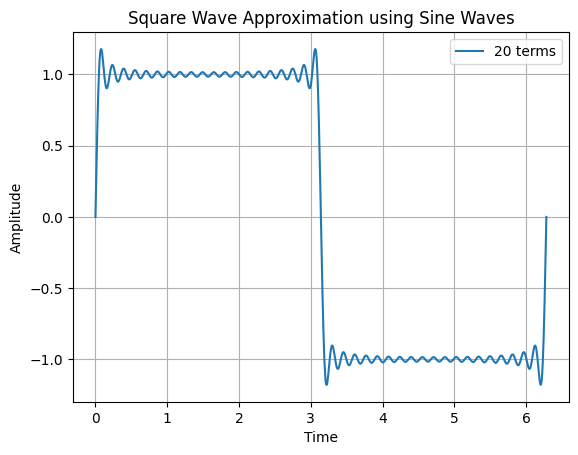

In [18]:
# Define time domain
t = np.linspace(0, 2*np.pi, 1000)  # One period

# Number of terms in the Fourier series
n_terms = 20  

# Initialize square wave approximation
square_wave = np.zeros_like(t)

# Construct Fourier series (only odd harmonics contribute)
for k in range(1, n_terms * 2, 2):  
    square_wave += np.sin(k * t) / k

# Scale to normalize
square_wave *= 4 / np.pi

plt.plot(t, square_wave, label=f'{n_terms} terms')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Square Wave Approximation using Sine Waves')
plt.legend()
plt.grid(True)
plt.show()


## Gravitational Waves

This treatment goes for water waves, sound waves, electral waves, and even graviational waves.

Let's design a simple model for gravitational waves:

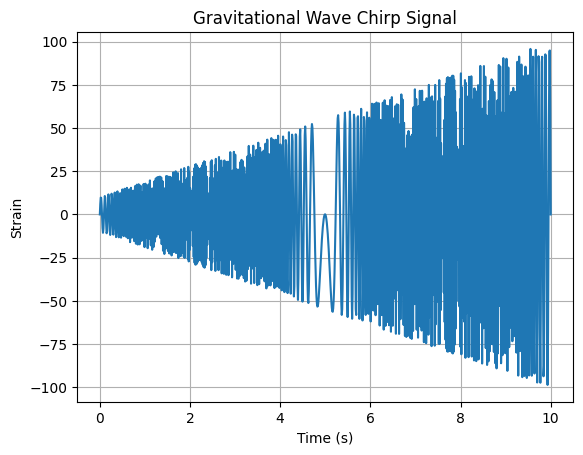

In [ ]:
def generate_GW_chirp(df=.1, dt=0.01, duration=10.0, f_start=10, f_end=100):
    nt = int(np.floor(duration / dt))
    times = np.linspace(0, duration, nt)
    
    # Frequency increases with time
    freqs = f_start + (f_end - f_start) * (times / duration)
    
    chirp_signal = np.zeros(nt)
    for i, t in enumerate(times):
        coeff = freqs[i]  # Linear Scaling coefficient
        chirp_signal[i] = coeff * np.sin(2 * np.pi * freqs[i] * t)
    
    return times, chirp_signal

# Generate and plot the chirp signal
t, strain = generate_GW_chirp()

plt.plot(t, strain)
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.title("Gravitational Wave Chirp Signal")
plt.grid()
plt.show()

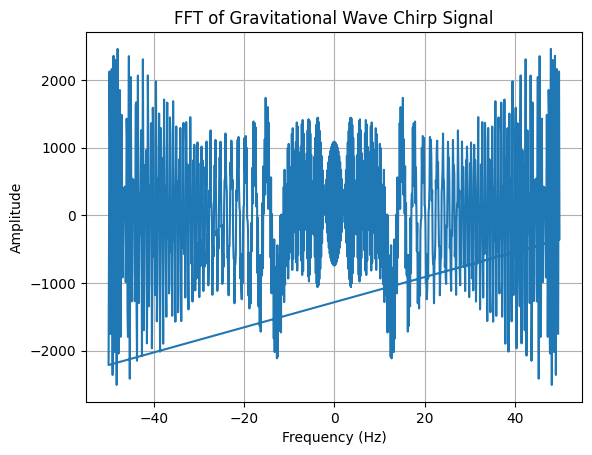

In [63]:
# Generate the chirp signal
t, strain = generate_GW_chirp()

# Compute the FFT of the chirp signal
fft_strain = np.fft.fft(strain)
fft_freq = np.fft.fftfreq(len(strain), d=.01)  # d is the sampling interval (dt)

# Plot the amplitude spectrum from the FFT
plt.plot(fft_freq, fft_strain)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT of Gravitational Wave Chirp Signal")
plt.grid()
plt.show()

/Users/ianjohnson/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ianjohnson/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


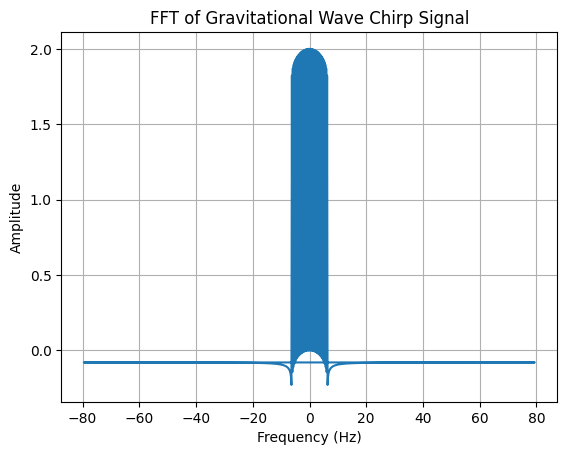

In [65]:
# Define time domain
t = np.linspace(0, 2*np.pi, 1000)  # One period

# Number of terms in the Fourier series
n_terms = 20  

# Initialize square wave approximation
square_wave = np.zeros_like(t)

# Construct Fourier series (only odd harmonics contribute)
for k in range(1, n_terms * 2, 2):  
    square_wave += np.sin(k * t) / k

# Scale to normalize
square_wave *= 4 / np.pi

# Compute the FFT of the chirp signal
fft_strain = np.fft.fft(square_wave)
fft_freq = np.fft.fftfreq(len(square_wave), d=2*np.pi/1000)  # d is the sampling interval (dt)

# Plot the amplitude spectrum from the FFT
plt.plot(fft_freq, fft_strain)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT of Gravitational Wave Chirp Signal")
plt.grid()
plt.show()

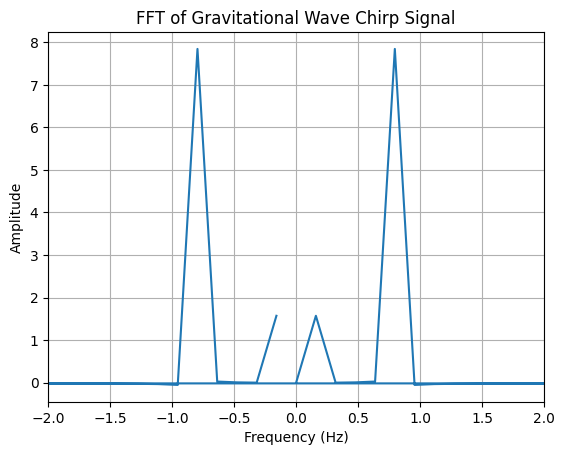

In [ ]:

# Compute the FFT of the chirp signal
fft_strain = np.fft.fft(sine_wave2+sine_wave1)
fft_freq = np.fft.fftfreq(len(sine_wave2+sine_wave1), d=2*np.pi/1000)  # d is the sampling interval (dt)

# Plot the amplitude spectrum from the FFT
plt.plot(fft_freq, fft_strain)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim([-2,2])
plt.title("FFT of Gravitational Wave Chirp Signal")
plt.grid()
plt.show()

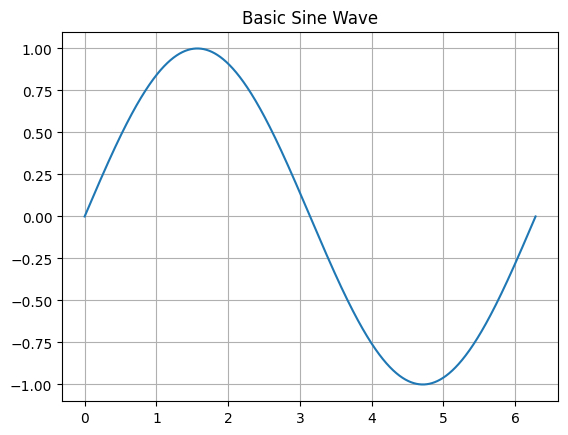

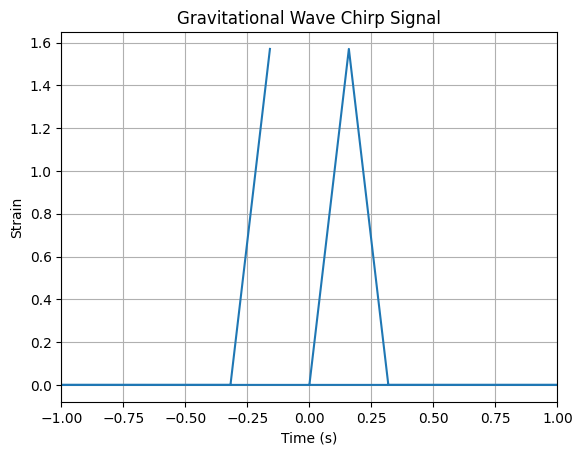

In [75]:
start = 0
end = 2* np.pi
steps_number = 10000
times = np.linspace(start, end, steps_number)
sine_wave = np.sin(times)

plt.plot(times, sine_wave)
plt.grid(True)
plt.title('Basic Sine Wave')
plt.show()

# Compute the FFT of the chirp signal
fft_sine = np.fft.fft(sine_wave)
fft_freq = np.fft.fftfreq(len(sine_wave), d=times[1]-times[0])  # d is the sampling interval (dt)

plt.plot(fft_freq, fft_sine)
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.xlim([-1,1])
plt.title("Gravitational Wave Chirp Signal")
plt.grid()
plt.show()